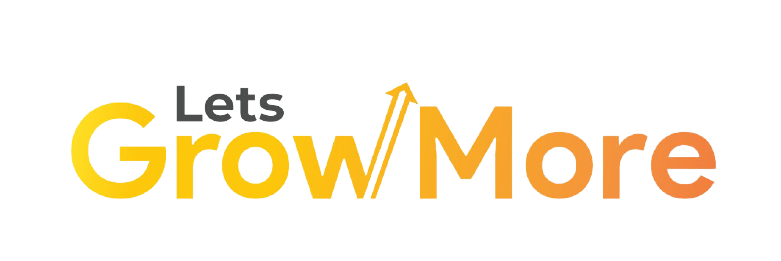

# LetsGrowMore Vip Data Science

## Task 4 - Prediction Using Decision Tree and Algorithm

## Code Author - Manoj Kumar

### Importing Modules & Dataset

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [64]:
columns=["Sepal Length","Sepal Width","Petal Length","Petal Width","SpeciesTypes"]
data=pd.read_csv("D:\Datasets\iris.data",names=columns)

In [65]:
data.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,SpeciesTypes
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data Cleaning and Processing

In [66]:
data.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
SpeciesTypes    0
dtype: int64

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   SpeciesTypes  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [68]:
data.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data Visualization 

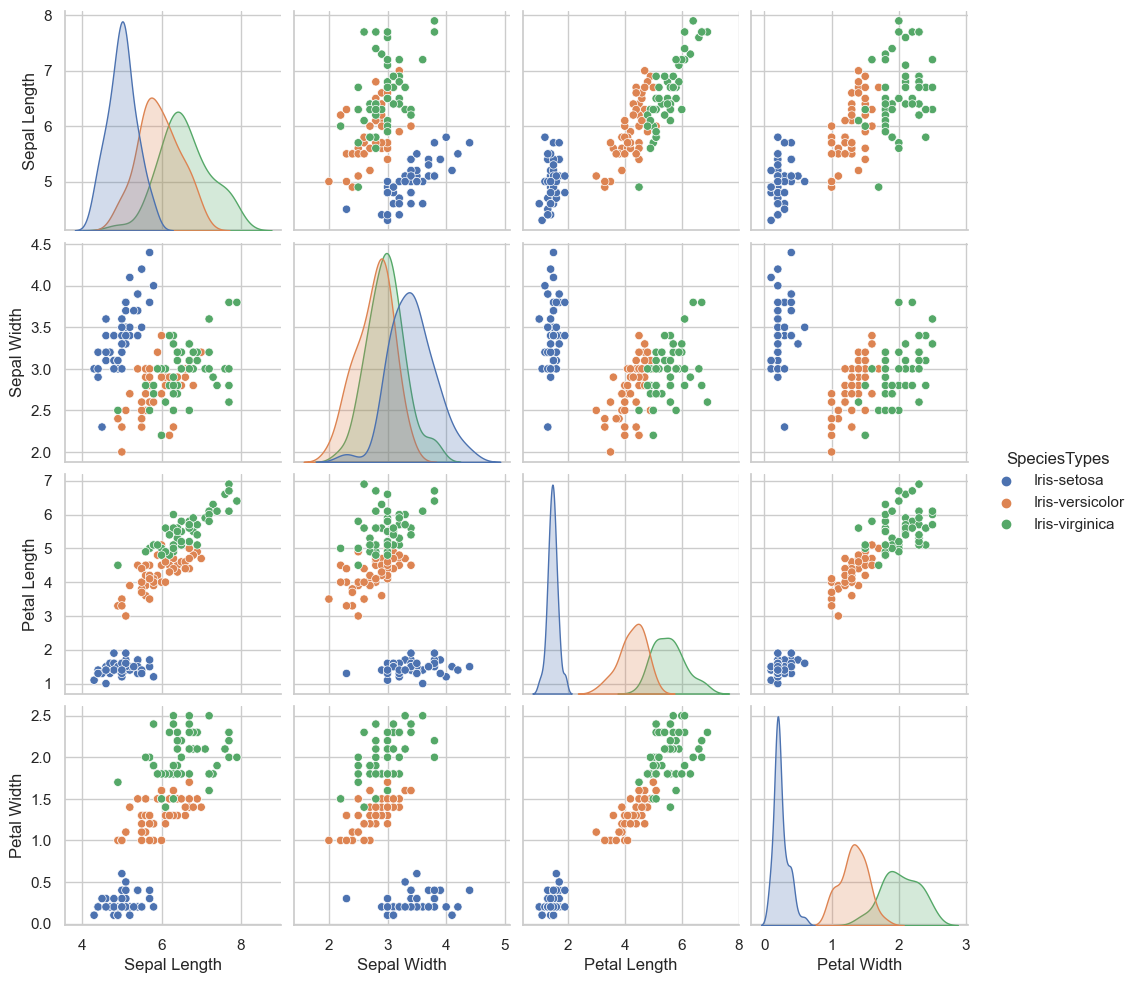

In [69]:
sns.set(style="whitegrid")
sns.pairplot(data,hue="SpeciesTypes")

###  Split data into train and test set

In [70]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
x=data[['Sepal Length','Sepal Width','Petal Length','Petal Width']].values
y=data['SpeciesTypes'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [71]:
param_grid = {'max_depth': np.arange(2, 8),
             'max_features': np.arange(2,5)}

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10,verbose=1,n_jobs=-1)
tree.fit(x_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7]),
                         'max_features': array([2, 3, 4])},
             verbose=1)

In [75]:
print(tree.best_score_)

print("\n",tree.best_estimator_)

print('\n',tree.best_params_)

0.95

 DecisionTreeClassifier(max_depth=6, max_features=3)

 {'max_depth': 6, 'max_features': 3}


In [76]:
train_pred = tree.predict(x_train)
test_pred = tree.predict(x_test)

In [77]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, test_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.86      1.00      0.92         6
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



### Train the decision tree classifier

In [78]:
clf_tree = DecisionTreeClassifier( max_depth = 4, max_features=2)
clf_tree.fit(x_train,y_train )

DecisionTreeClassifier(max_depth=4, max_features=2)

In [79]:
tree_test_pred = pd.DataFrame( { 'actual': y_test,
                            'predicted': clf_tree.predict(x_test) } )

In [80]:
tree_test_pred.sample(n=10)

,actual,predicted
1,Iris-virginica,Iris-virginica
14,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa
17,Iris-setosa,Iris-setosa
12,Iris-versicolor,Iris-versicolor
21,Iris-virginica,Iris-versicolor
9,Iris-versicolor,Iris-versicolor
29,Iris-setosa,Iris-setosa
4,Iris-setosa,Iris-setosa
22,Iris-setosa,Iris-setosa


In [81]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.9666666666666667

### Visulaize the Decision Tree & Save the Tree

Text(0.5, 20.049999999999997, 'Predicted label')

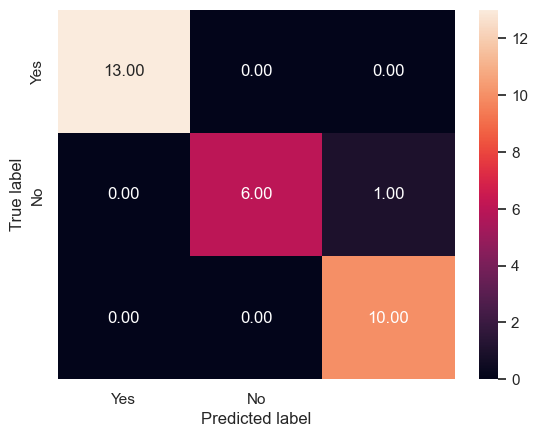

In [82]:
tree_cm = metrics.confusion_matrix(tree_test_pred.predicted,tree_test_pred.actual)
sns.heatmap(tree_cm, annot=True,fmt='.2f',xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

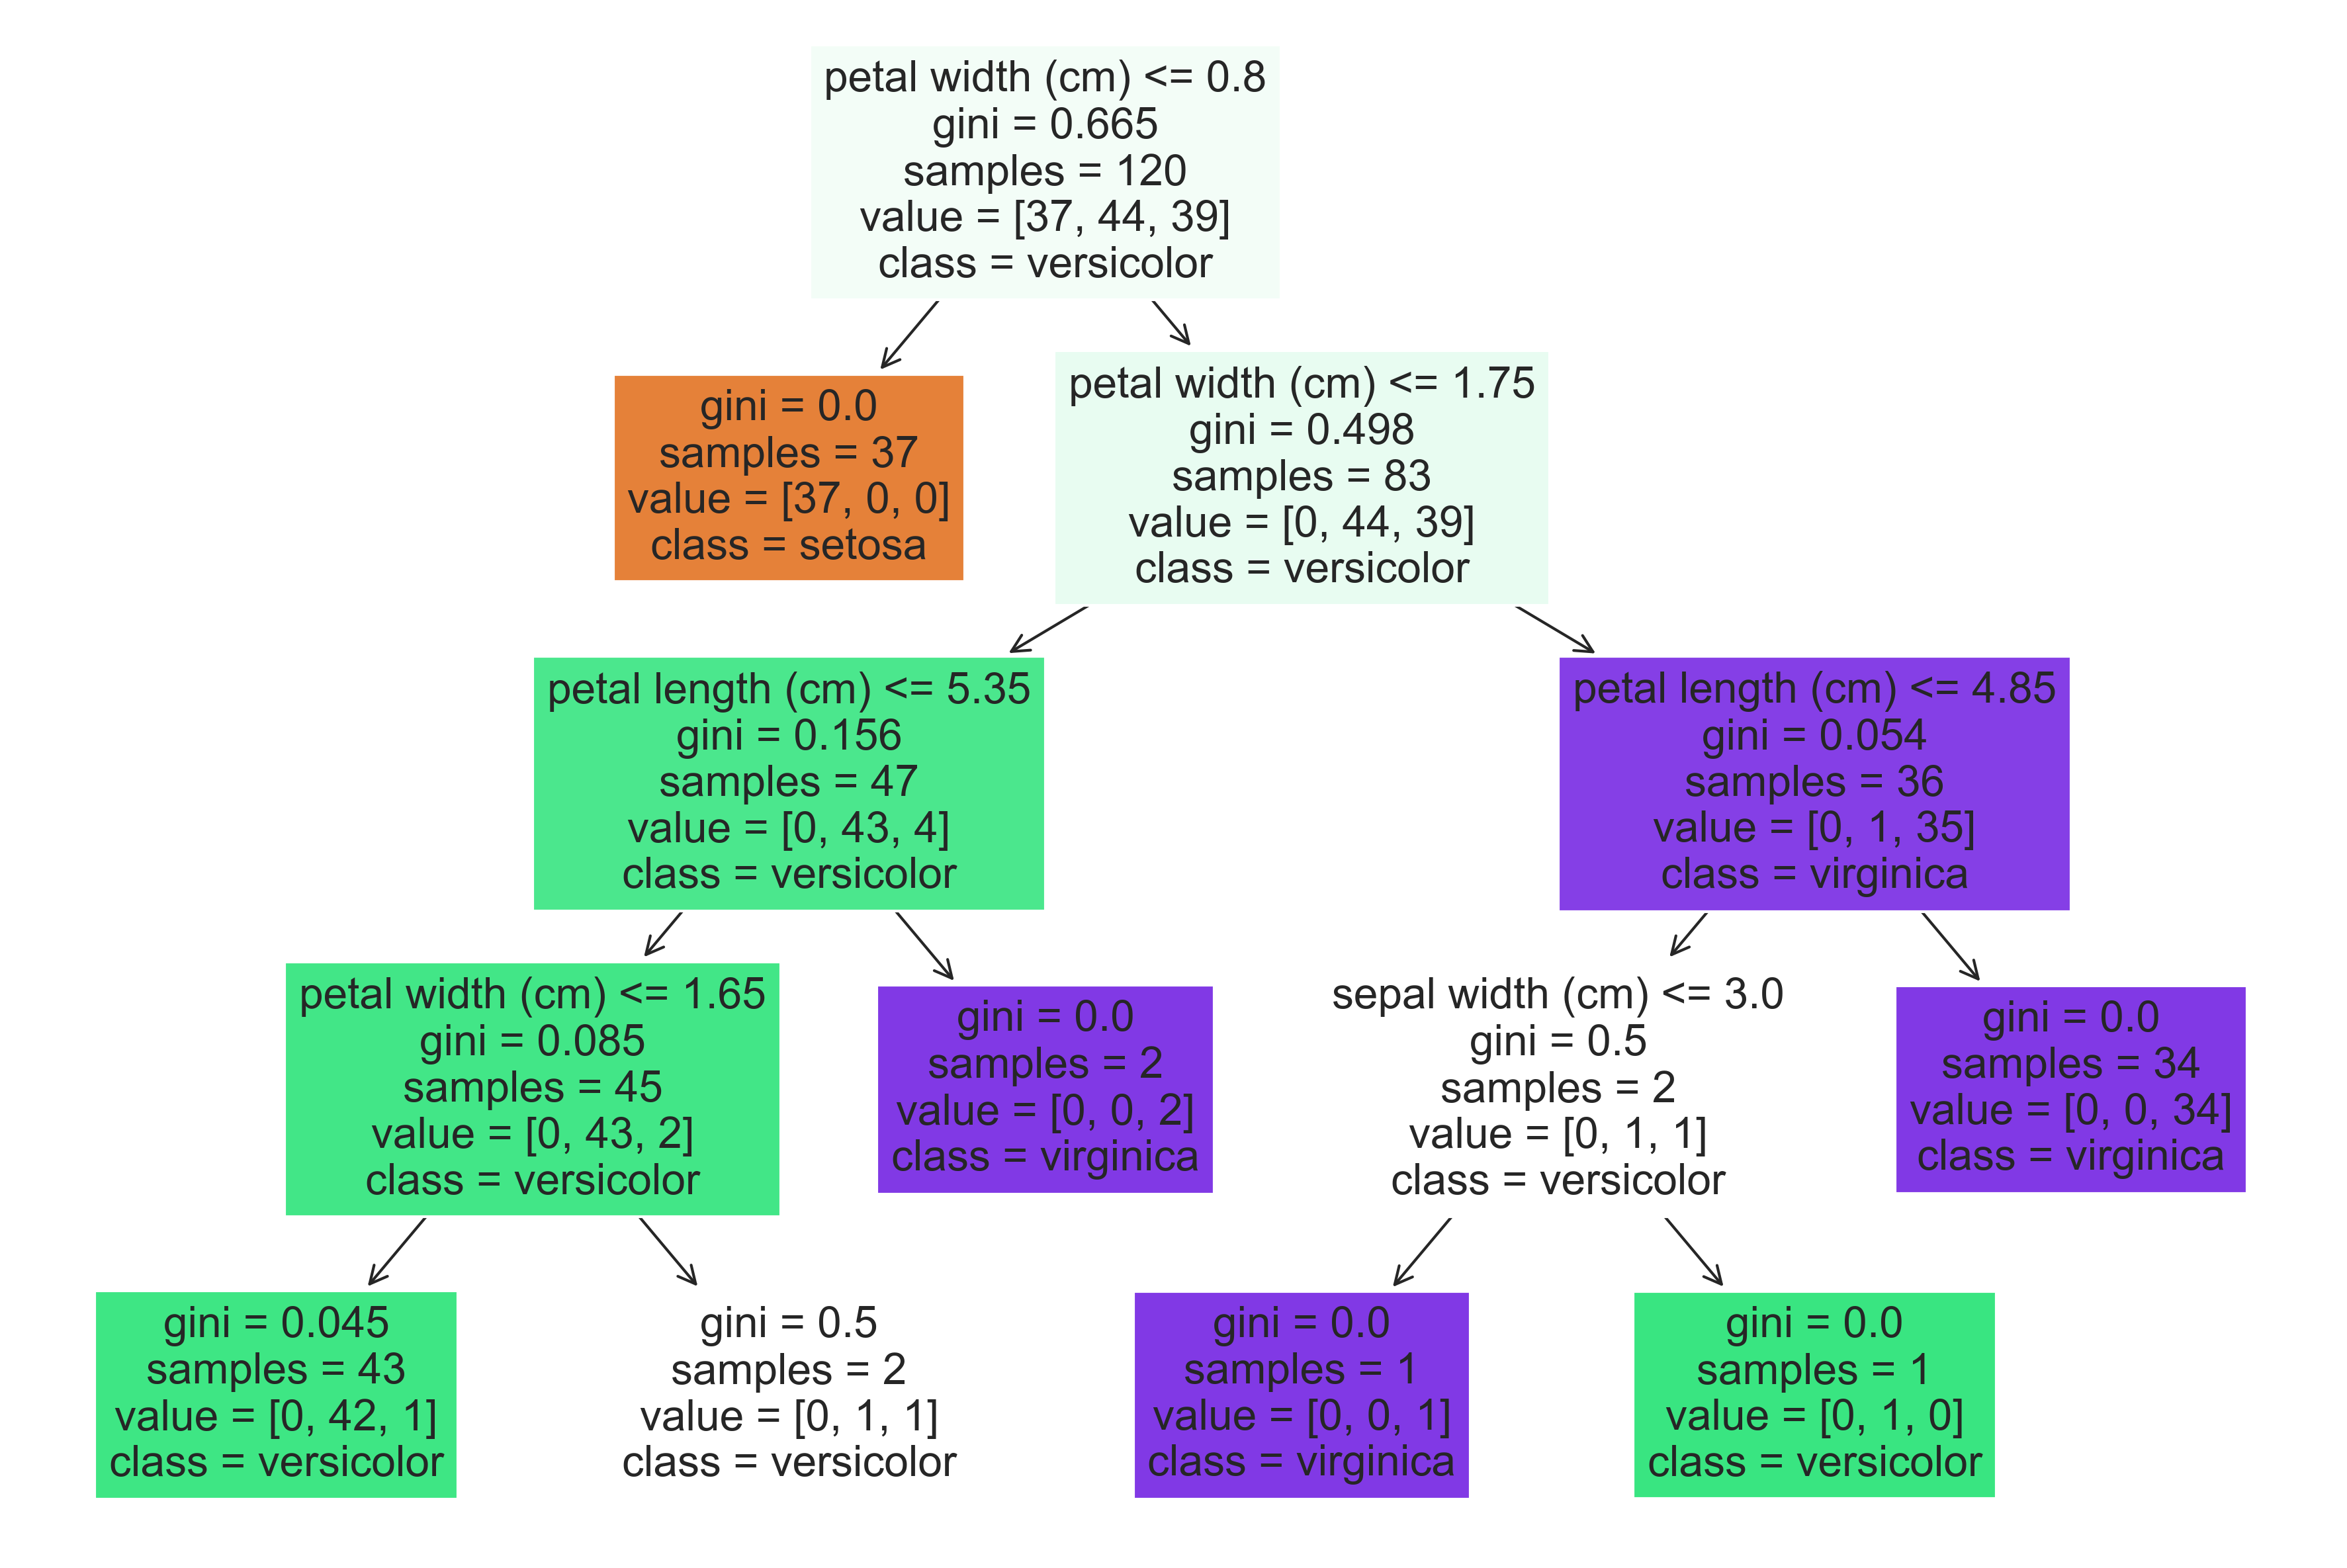

In [83]:
from sklearn import tree
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (15,10), dpi=300)
tree.plot_tree(clf_tree,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.jpeg')